In [331]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np


iris = datasets.load_iris()
wine = datasets.load_wine()
cancer = datasets.load_breast_cancer()

def standarize(x):
    sc = StandardScaler()
    x = sc.fit_transform(x)
    return x

def split_data(d):
    x = d.data
    y = d.target.reshape(-1, 1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    x_train = standarize(x_train)
    x_test = standarize(x_test)
    y_train = y_train.reshape(-1)
    y_test = y_test.reshape(-1)
    return x_train, y_train, x_test, y_test


In [332]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

def knn(x_train, y_train, x_test, k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train, y_train)
    return neigh.predict(x_test)

def svm_class(x_train, y_train, x_test):
    clf = svm.SVC()
    clf.fit(x_train,y_train)
    return clf.predict(x_test)

def dt_class(x_train, y_train, x_test, d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(x_train,y_train)
    return clf.predict(x_test)

def lg_class(x_train, y_train, x_test, multiclass=False):
    if multiclass:
        clf = LogisticRegression(multi_class='ovr') 
        clf.fit(x_train, y_train)
        return clf.predict(x_test)
    else: 
        clf = LogisticRegression()
        clf.fit(x_train, y_train) 
        return clf.predict(x_test)

    

In [333]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

def result(y_test, y_pred, kind):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average=kind)
    rec = recall_score(y_test, y_pred, average=kind)
    f1 = f1_score(y_test, y_pred, average=kind)
    return [acc, prec, rec, f1]

def matrix(y_pred, y_test, metoda):
    c = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(c, annot=True, fmt='d')
    ax.set_xlabel("Predicted", fontsize=11, labelpad=20)
    ax.set_ylabel("Actual", fontsize=11, labelpad=20)
    unique_labels = np.unique(np.concatenate((y_test, y_pred)))
    ax.xaxis.set_ticklabels(unique_labels)
    ax.yaxis.set_ticklabels(unique_labels)
    ax.set_title(f'Metoda: {metoda}', fontsize=14, pad=20)
 
    plt.show()
    
def roc_auc(y_pred, y_test, metoda):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'ROC curve (area ={round(auc, 3)}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title(f'{metoda}')
    plt.legend()
    plt.show()
    
    
def table_of_results(x_train, y_train, x_test, y_test, kind, k, h, multiclass):
    columns = ['KNN', 'SVM', 'DecisionTree', 'LogisticRegression']
    indexes = ['accuracy', 'precision', 'recall', 'f1']
    frame = pd.DataFrame(columns = columns, index=indexes)
    y_pred_knn = knn(x_train, y_train, x_test, k)
    y_pred_svm = svm_class(x_train, y_train, x_test)
    y_pred_dt = dt_class(x_train, y_train, x_test, h)
    y_pred_lg = lg_class(x_train, y_train, x_test, multiclass=multiclass)
    frame['KNN'] = result(y_test, y_pred_knn, kind)
    frame['SVM'] = result(y_test, y_pred_svm, kind)
    frame['DecisionTree'] = result(y_test, y_pred_dt, kind)
    frame['LogisticRegression'] = result(y_test, y_pred_lg, kind)
    return frame


# IRIS DATA

In [334]:
def check_best_h(x_train, y_train):
    tree_classifier = DecisionTreeClassifier()
    param_grid = {'max_depth': [3, 5, 7, 10]}
    
    grid_search = GridSearchCV(estimator=tree_classifier, param_grid=param_grid, cv=5)
    
    grid_search.fit(x_train, y_train)
    best_tree_classifier = grid_search.best_estimator_
    
    print("Najlepsze parametry:", grid_search.best_params_)
    h = grid_search.best_params_.get('max_depth')
    return h 


### Sprawdzenie czy klasy równoważne


C:\Users\HP\AppData\Local\Temp\ipykernel_8808\2099319284.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  counts_iris = pd.value_counts(iris.target)
C:\Users\HP\AppData\Local\Temp\ipykernel_8808\2099319284.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  counts_wine = pd.value_counts(wine.target)
C:\Users\HP\AppData\Local\Temp\ipykernel_8808\2099319284.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  counts_cancer = pd.value_counts(cancer.target)


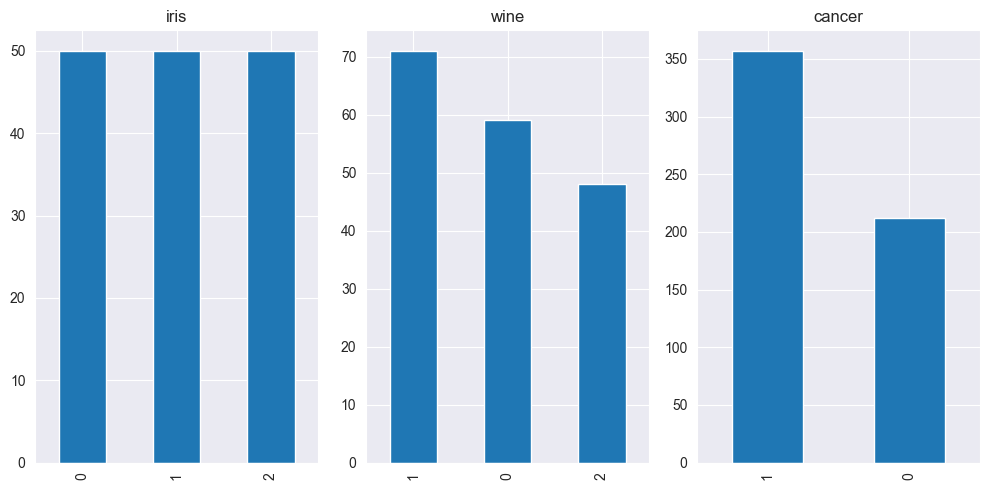

In [335]:
counts_iris = pd.value_counts(iris.target)
counts_wine = pd.value_counts(wine.target)
counts_cancer = pd.value_counts(cancer.target)


fig, ax = plt.subplots(1, 3, figsize=(10,5))
counts_iris.plot(kind='bar', ax=ax[0])
ax[0].set_title('iris')
counts_wine.plot(kind='bar', ax=ax[1])
ax[1].set_title('wine')
counts_cancer.plot(kind='bar', ax=ax[2])
ax[2].set_title('cancer')

plt.tight_layout()
plt.show()

In [336]:
x_train, y_train, x_test, y_test = split_data(iris)
h = check_best_h(x_train, y_train)

K = int(np.sqrt(x_train.shape[0]))

y_knn = knn(x_train, y_train, x_test, K)
y_svm = svm_class(x_train, y_train, x_test)
y_dt = dt_class(x_train, y_train, x_test, h)

table_of_results(x_train, y_train, x_test, y_test, 'macro', K, h, True) # macro -  Miary są obliczane dla każdej klasy osobno, a następnie uśredniane. Każda klasa ma równą wagę.

Najlepsze parametry: {'max_depth': 10}


,KNN,SVM,DecisionTree,LogisticRegression
accuracy,0.966667,0.966667,1.0,1.0
precision,0.966667,0.966667,1.0,1.0
recall,0.969697,0.969697,1.0,1.0
f1,0.966583,0.966583,1.0,1.0


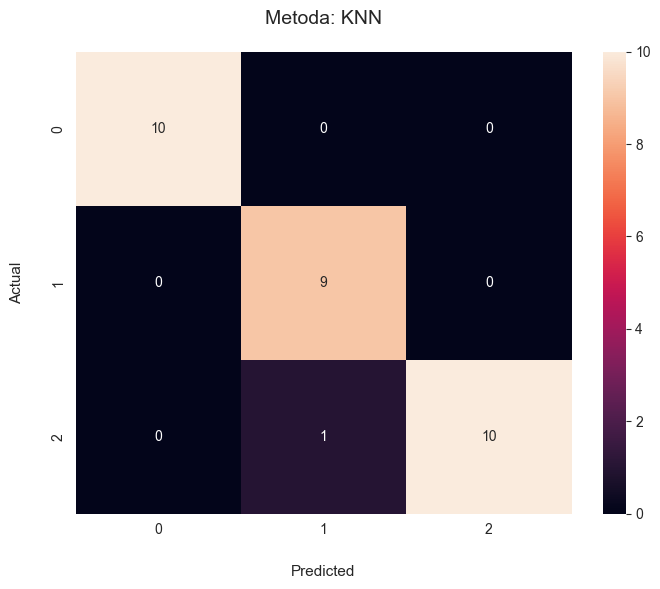

In [337]:
matrix(y_knn, y_test, 'KNN')

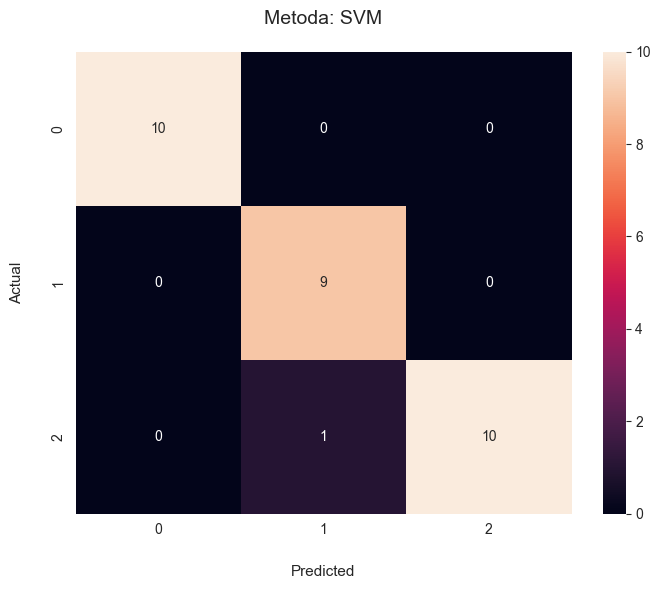

In [338]:
matrix(y_svm, y_test, 'SVM')

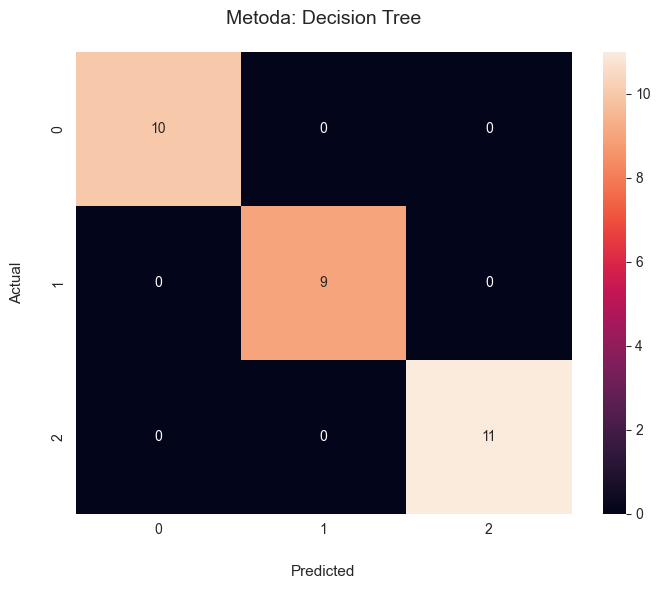

In [339]:
matrix(y_dt, y_test, 'Decision Tree')

# WINE

In [340]:
x_train2, y_train2, x_test2, y_test2 = split_data(wine)
h2 = check_best_h(x_train2, y_train2)

K2 = int(np.sqrt(x_train2.shape[0]))

y_knn2 = knn(x_train2, y_train2, x_test2, K2)
y_svm2 = svm_class(x_train2, y_train2, x_test2)
y_dt2 = dt_class(x_train2, y_train2, x_test2, h2)

table_of_results(x_train2, y_train2, x_test2, y_test2, 'weighted', K2, h2, True) 

Najlepsze parametry: {'max_depth': 3}


,KNN,SVM,DecisionTree,LogisticRegression
accuracy,0.972222,1.0,0.944444,1.0
precision,0.975309,1.0,0.951389,1.0
recall,0.972222,1.0,0.944444,1.0
f1,0.972525,1.0,0.944856,1.0


# CANCER

In [341]:
x_train3, y_train3, x_test3, y_test3 = split_data(cancer)
h3 = check_best_h(x_train3, y_train3)

K3 = int(np.sqrt(x_train3.shape[0]))

y_knn3 = knn(x_train3, y_train3, x_test3, K3)
y_svm3 = svm_class(x_train3, y_train3, x_test3)
y_dt3 = dt_class(x_train3, y_train3, x_test3, h3)
y_lg3 = lg_class(x_train3, y_train3, x_test3, False)

table_of_results(x_train3, y_train3, x_test3, y_test3, 'binary', K3, h3, False) 

Najlepsze parametry: {'max_depth': 5}


,KNN,SVM,DecisionTree,LogisticRegression
accuracy,0.956140,0.982456,0.921053,0.982456
precision,0.945946,0.972603,0.918919,0.972603
recall,0.985915,1.000000,0.957746,1.000000
f1,0.965517,0.986111,0.937931,0.986111


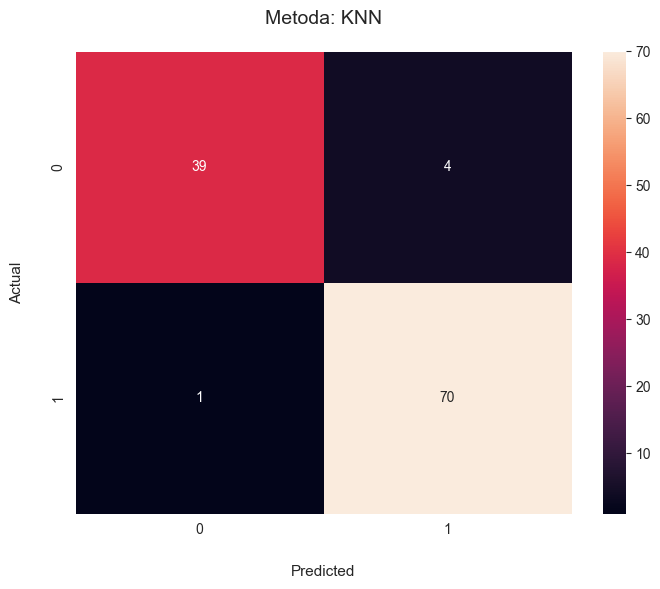

In [342]:
matrix(y_knn3, y_test3, 'KNN')

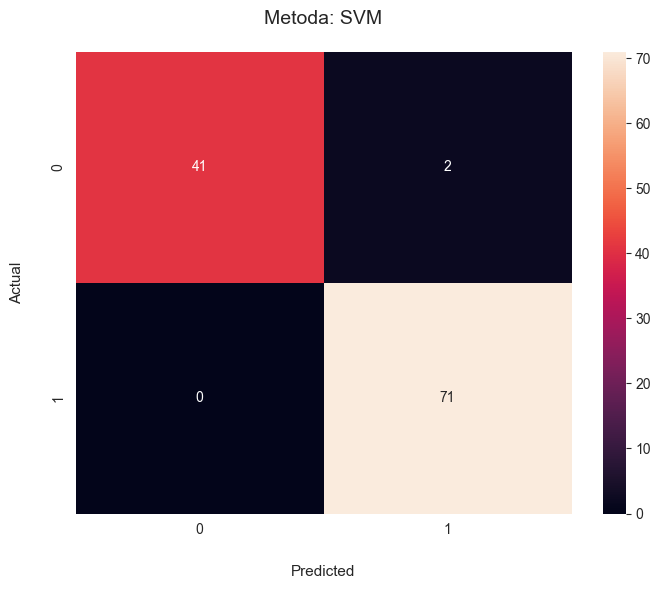

In [343]:
matrix(y_svm3, y_test3, 'SVM')

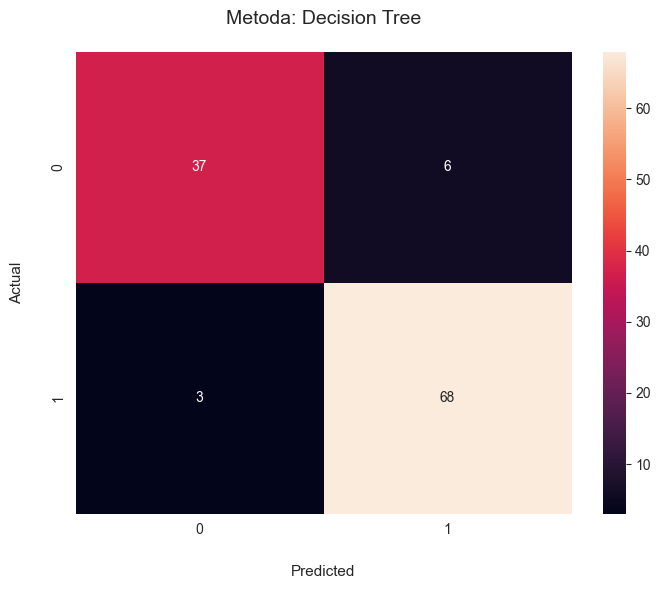

In [344]:
matrix(y_dt3, y_test3, 'Decision Tree')

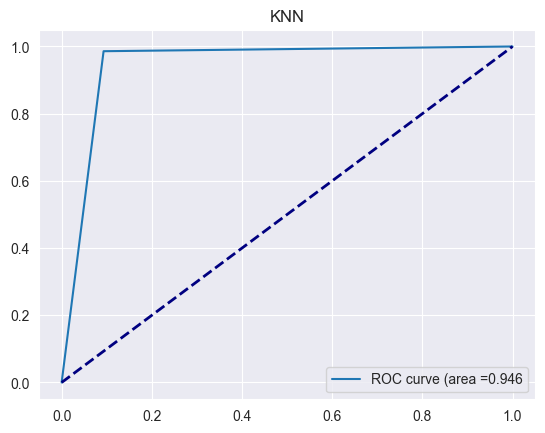

In [345]:
roc_auc(y_knn3, y_test3, 'KNN')

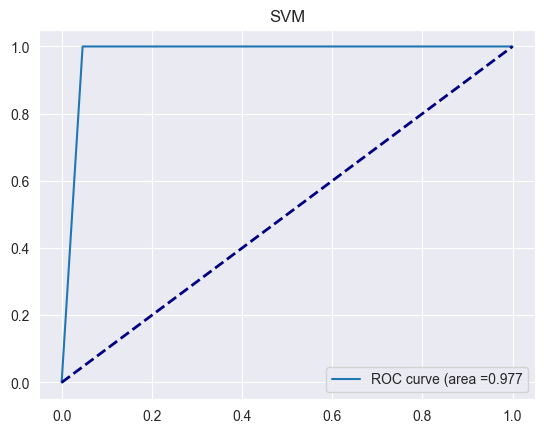

In [346]:
roc_auc(y_svm3, y_test3, 'SVM')

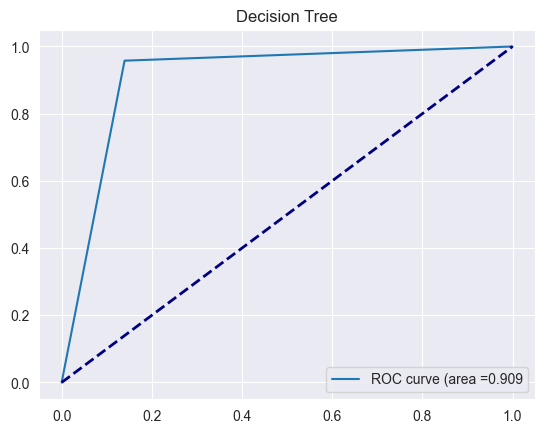

In [347]:
roc_auc(y_dt3, y_test3, 'Decision Tree')

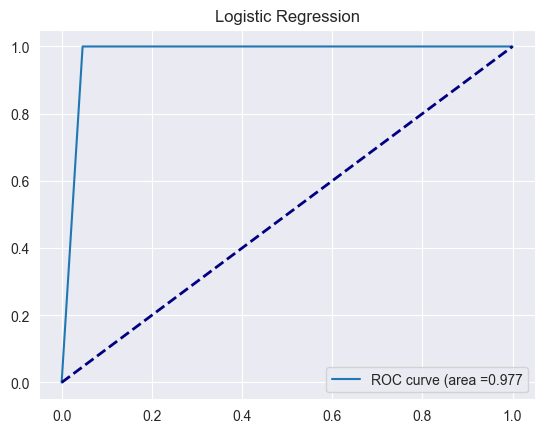

In [348]:
roc_auc(y_lg3, y_test3, 'Logistic Regression')

# ZADANIE 2

Text(0.5, 1.0, 'blobs')

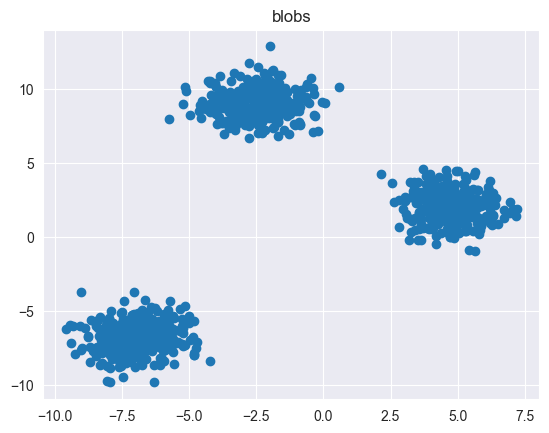

In [349]:
from sklearn.datasets import make_blobs, make_moons

X_blobs, y_blobs = make_blobs(n_samples=1000, centers=3, random_state=42)
X_moons, y_moons = make_moons(n_samples=1000, noise=0.2, random_state=42)

plt.scatter(X_blobs[:, 0], X_blobs[:, 1])
plt.title('blobs')

Text(0.5, 1.0, 'moons')

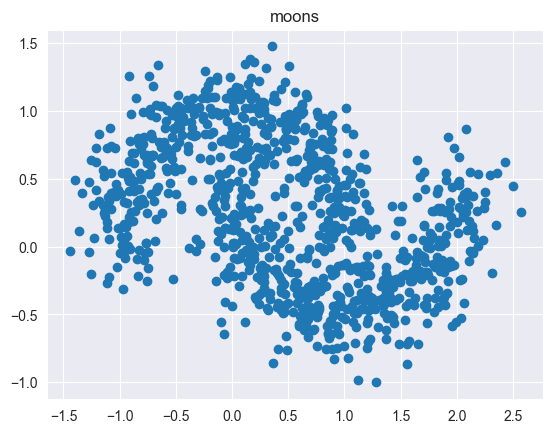

In [350]:
plt.scatter(X_moons[:, 0], X_moons[:, 1])
plt.title('moons')

In [351]:
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, estimate_bandwidth


def kmean(c, x):
    kmeans_blobs = KMeans(n_clusters=c, random_state=42).fit_predict(x)
    return kmeans_blobs

def meanshift(r, x):
    mshift = MeanShift(bandwidth=r).fit_predict(x)
    return mshift

def hierarchical_clustering(c, x):
    hc = AgglomerativeClustering(n_clusters=c).fit_predict(x)
    return hc

def wykres(labels, x, metoda):
    plt.figure(figsize=(8, 6))
    plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(f'{metoda}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [352]:
from scipy.cluster.hierarchy import dendrogram, linkage

def check_k(x):
    error = [] 
    for i in range(1, 11): 
        kmeans = KMeans(n_clusters = i, random_state = 42)
        kmeans.fit(x) 
        error.append(kmeans.inertia_) # # Inertia to suma kwadratów odległości punktów do ich najbliższego centroida (wartość funkcji celu)
    
    plt.plot(range(1, 11), error)
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS') 
    plt.show()
    
def check_r(x):
    bandwidth = estimate_bandwidth(x, quantile=0.4, n_samples=500)
    return bandwidth

def dendogram(x):
    Z = linkage(x, method='ward') 
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()


In [353]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score, homogeneity_score, mutual_info_score

def metrics_clustering(labels, X, y_true):
    silhouette_scores = silhouette_score(X, labels)
    calinski_harabasz_scores = calinski_harabasz_score(X, labels)
    rand_scores = adjusted_rand_score(y_true, labels)
    homogeneity_scores = homogeneity_score(y_true, labels)
    mutual_info_scores = mutual_info_score(y_true, labels)
    return [silhouette_scores, calinski_harabasz_scores, rand_scores, homogeneity_scores, mutual_info_scores]


## BLOBS

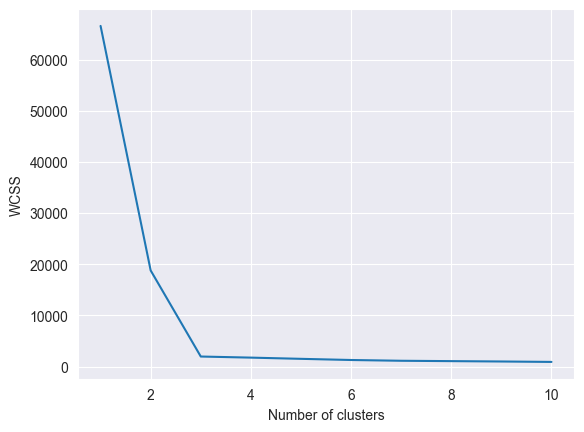

In [354]:
check_k(X_blobs)

In [355]:
k = 3

In [356]:
check_r(X_blobs)

10.926401554730283

In [357]:
r = 1.87

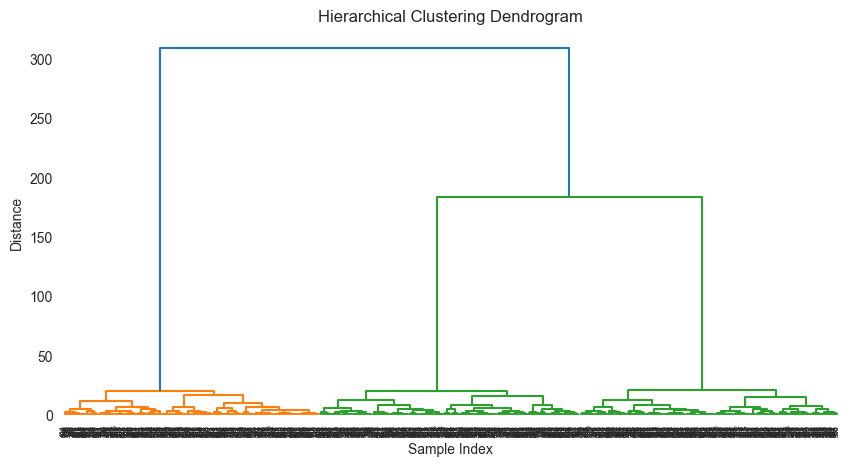

In [358]:
dendogram(X_blobs)

In [359]:
c = 3

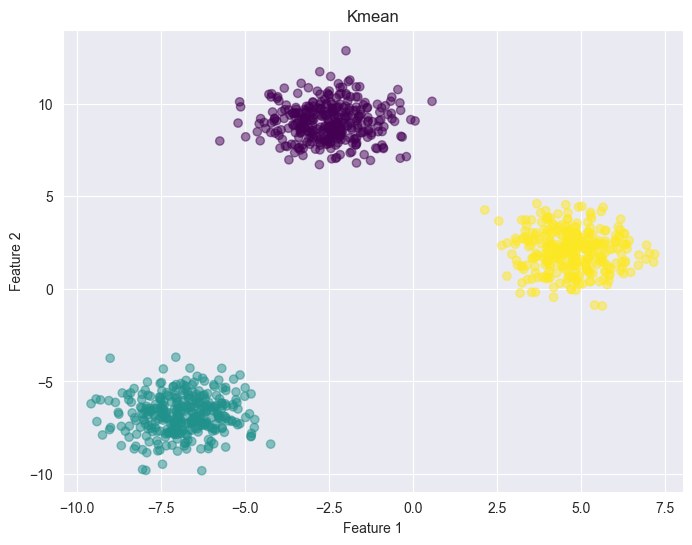

In [360]:
kmean_blobs = kmean(k, X_blobs)
wykres(kmean_blobs, X_blobs, 'Kmean')

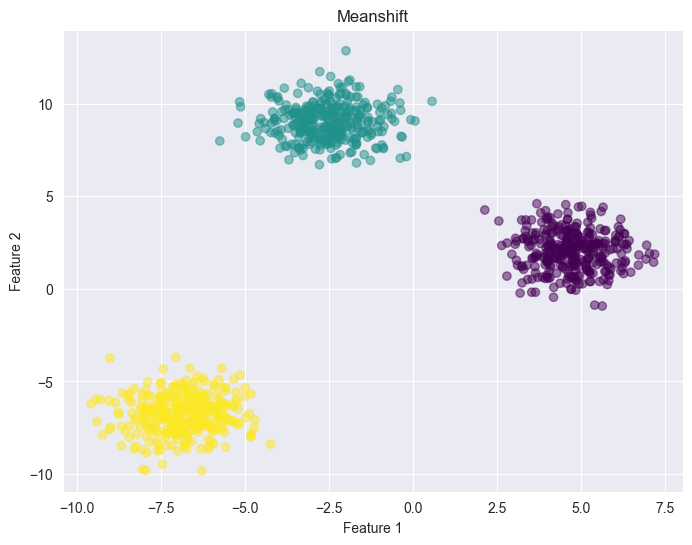

In [361]:
meanshift_blobs = meanshift(r, X_blobs)
wykres(meanshift_blobs, X_blobs, 'Meanshift')

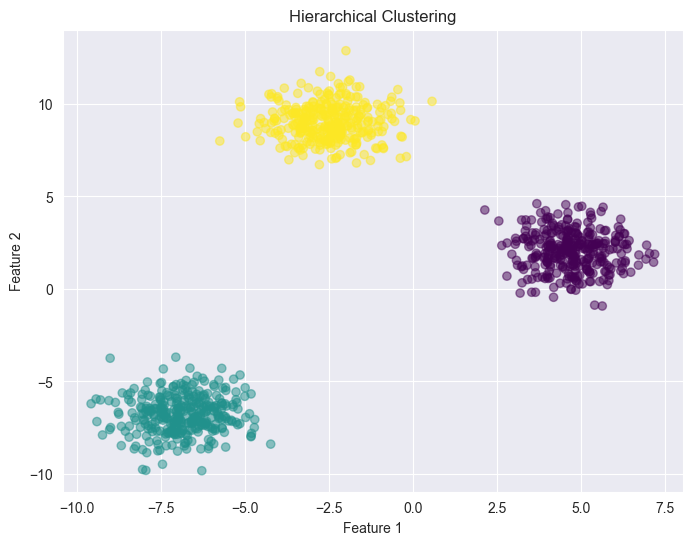

In [362]:
hc_blobs = hierarchical_clustering(c, X_blobs)
wykres(hc_blobs, X_blobs, 'Hierarchical Clustering')

In [363]:
columns = ['kmeans', 'meanshift', 'hierarchical clustering']
metrics_names = ['Silhouette Coefficient', 'Calinski-Harabasz Index', 'Rand Index', 'Homogeneity', 'Mutual Information']
frame = pd.DataFrame(columns = columns, index=metrics_names)
frame['kmeans'] = metrics_clustering(kmean_blobs, X_blobs, y_blobs)
frame['meanshift'] = metrics_clustering(meanshift_blobs, X_blobs, y_blobs)
frame['hierarchical clustering'] = metrics_clustering(hc_blobs, X_blobs, y_blobs)
frame

,kmeans,meanshift,hierarchical clustering
Silhouette Coefficient,0.843571,0.843571,0.843571
Calinski-Harabasz Index,16512.260780,16512.260780,16512.260780
Rand Index,1.000000,1.000000,1.000000
Homogeneity,1.000000,1.000000,1.000000
Mutual Information,1.098611,1.098611,1.098611


# MOONS

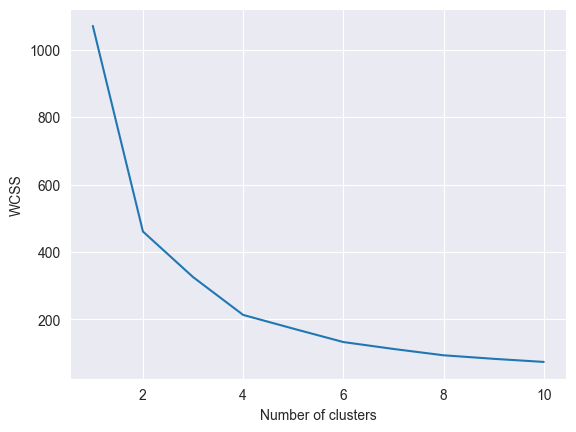

In [364]:
check_k(X_moons)

In [365]:
k = 4

In [366]:
check_r(X_moons)

1.0547116915476122

In [367]:
r = 1.05

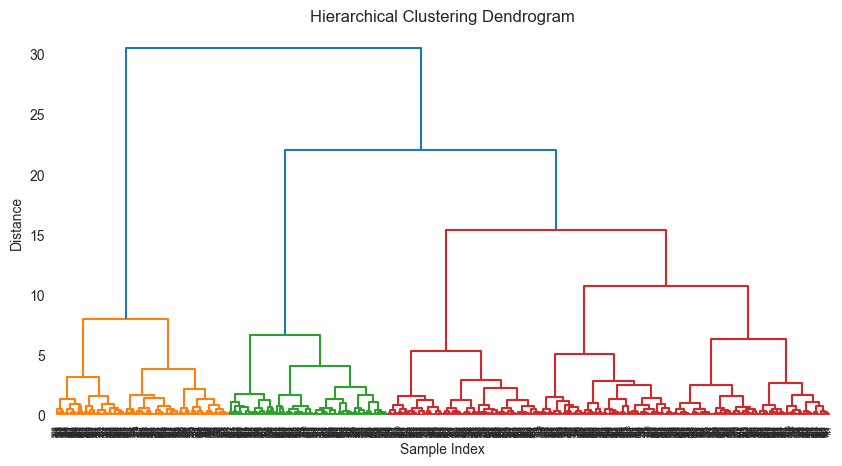

In [368]:
dendogram(X_moons)

In [369]:
c = 4

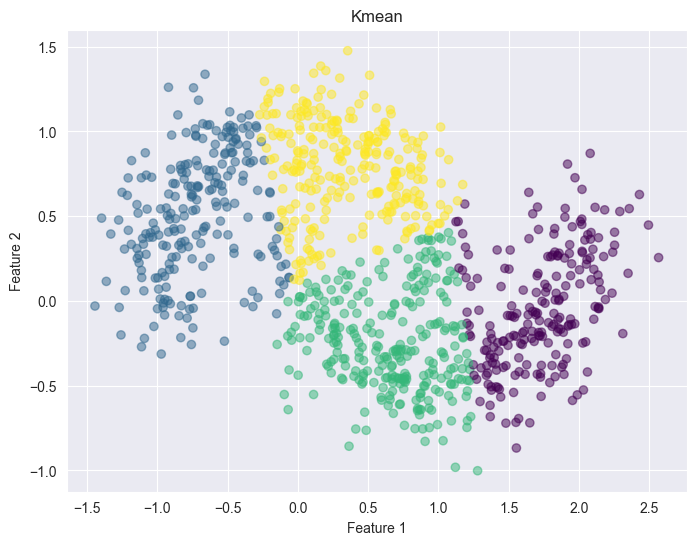

In [370]:
kmean_moons = kmean(k, X_moons)
wykres(kmean_moons, X_moons, 'Kmean')

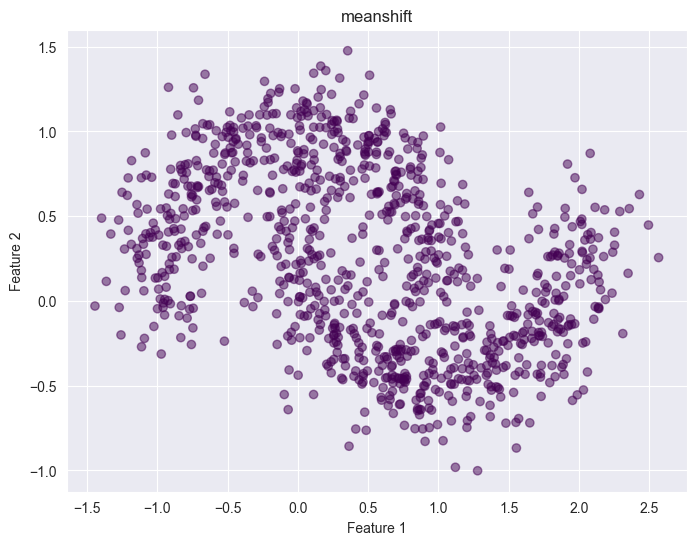

In [371]:
meanshift_moons = meanshift(r, X_moons)
wykres(meanshift_moons, X_moons, 'meanshift')

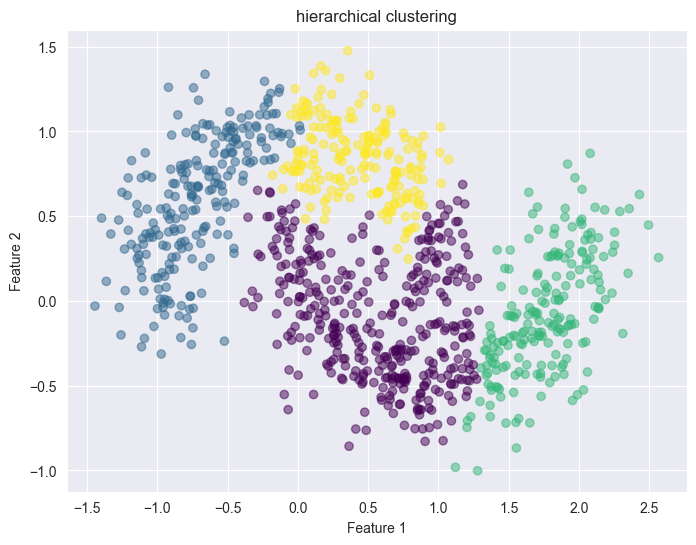

In [372]:
hc_moons = hierarchical_clustering(c, X_moons)
wykres(hc_moons, X_moons, 'hierarchical clustering')

In [373]:
columns = ['kmeans', 'meanshift', 'hierarchical clustering']
metrics_names = ['Silhouette Coefficient', 'Calinski-Harabasz Index', 'Rand Index', 'Homogeneity', 'Mutual Information']
frame = pd.DataFrame(columns = columns, index=metrics_names)
frame['kmeans'] = metrics_clustering(kmean_moons, X_moons, y_blobs)
#frame['meanshift'] = metrics_clustering(meanshift_moons, X_moons, y_moons)
frame['hierarchical clustering'] = metrics_clustering(hc_moons, X_moons, y_moons)
frame

,kmeans,meanshift,hierarchical clustering
Silhouette Coefficient,0.428040,NaN,0.395131
Calinski-Harabasz Index,1332.515255,NaN,1123.247215
Rand Index,0.001773,NaN,0.314295
Homogeneity,0.005048,NaN,0.611460
Mutual Information,0.005546,NaN,0.423832


## ZADANIE 3

https://archive.ics.uci.edu/dataset/45/heart+disease

In [374]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

  
print(heart_disease.variables) 


        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [375]:
df = pd.DataFrame(X)
df['target'] = y
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [376]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        5
dtype: int64

In [377]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [378]:
filt = df['ca'].isna()
df[filt]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [379]:
filt = df['thal'].isna()
df[filt]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2


In [380]:
df_clean = df.dropna()
X = df_clean.drop('target', axis=1)
y = df_clean['target']

In [381]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train = standarize(x_train)
x_test = standarize(x_test)

h = check_best_h(x_train, y_train)

K = int(np.sqrt(x_train.shape[0]))

y_knn = knn(x_train, y_train, x_test, K)
y_svm = svm_class(x_train, y_train, x_test)
y_dt = dt_class(x_train, y_train, x_test, h)

table_of_results(x_train, y_train, x_test, y_test, 'weighted', K, h, True) 

Najlepsze parametry: {'max_depth': 3}


C:\Users\HP\PycharmProjects\BigData\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\PycharmProjects\BigData\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\PycharmProjects\BigData\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

,KNN,SVM,DecisionTree,LogisticRegression
accuracy,0.616667,0.633333,0.633333,0.633333
precision,0.526905,0.535354,0.533372,0.605000
recall,0.616667,0.633333,0.633333,0.633333
f1,0.568140,0.577949,0.579014,0.611675


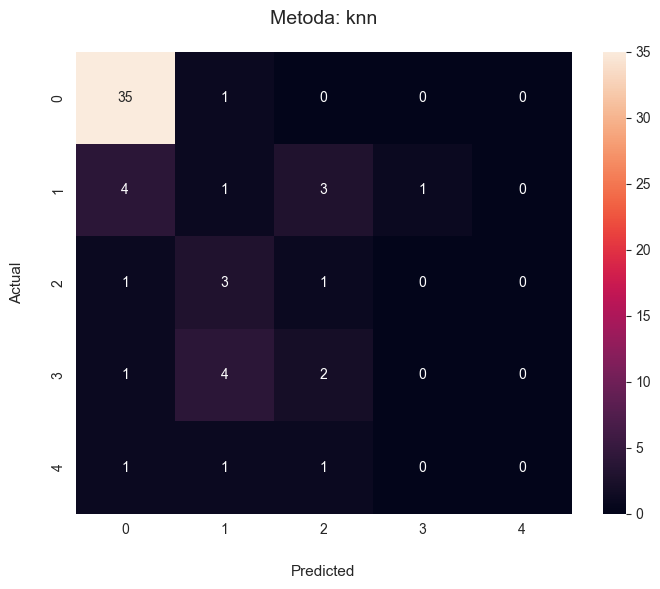

In [382]:
matrix(y_knn, y_test, 'knn')